In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
from util import run_model 
from util import evaluate_model

In [2]:
pd.set_option('display.max_columns',None)
data = pd.read_csv('./Data/kc_house_data.csv')

In [3]:
y = data['price']
X = data.drop('price', axis=1)

# Split the data out, specifying size of the split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,random_state=5)

#Join the dataframes back together 
data_train = pd.concat([X_train, y_train], axis=1)
data_test = pd.concat([X_test, y_test], axis=1)

In [4]:
def waterfront_cleanup(df, column_name):
    df['on_the_water'] = df[column_name]
    df.loc[ df['on_the_water'] != 1, ['on_the_water']] = 0
    df.loc[ df['on_the_water'] != 0, ['on_the_water']] = 1

waterfront_cleanup(data_train, 'waterfront')
data_train.on_the_water.value_counts()

0    17277
Name: on_the_water, dtype: int64

In [5]:
pd.set_option('display.max_columns', None)

zipcodes = []
def zipcode_encoder(df):
    for i in list(set(df['zipcode'])):
        data_train.loc[data_train['zipcode'] == i, 'zip_' + str(i)] = 1
        data_train.loc[data_train['zipcode'] != i, 'zip_' + str(i)] = 0
        
        data_test.loc[data_test['zipcode'] == i, 'zip_' + str(i)] = 1
        data_test.loc[data_test['zipcode'] != i, 'zip_' + str(i)] = 0
        
        zipcodes.append('zip_' + str(i))

zipcode_encoder(data_test)

        
data_test.head()
# print(zipcodes)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,zip_98177,zip_98178,zip_98052,zip_98053,zip_98055,zip_98056,zip_98058,zip_98059,zip_98188,zip_98065,zip_98070,zip_98198,zip_98072,zip_98199,zip_98074,zip_98075,zip_98077,zip_98092,zip_98102,zip_98103,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98112,zip_98115,zip_98116,zip_98117,zip_98118,zip_98119,zip_98122,zip_98039,zip_98125,zip_98126,zip_98040,zip_98001,zip_98002,zip_98003,zip_98004,zip_98133,zip_98006,zip_98005,zip_98136,zip_98008,zip_98010,zip_98011,zip_98007,zip_98014,zip_98144,zip_98146,zip_98019,zip_98148,zip_98022,zip_98023,zip_98024,zip_98027,zip_98028,zip_98155,zip_98030,zip_98031,zip_98029,zip_98033,zip_98034,zip_98032,zip_98166,zip_98038,zip_98168,zip_98042,zip_98045
15393,104560280,5/22/2014,4,3.00,1990,6180,2.0,NaN,NONE,Average,7 Average,1990,0.0,1990,0.0,98023,47.3083,-122.360,1910,6180,273000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6035,1725059316,11/20/2014,4,4.00,6330,13296,2.0,NO,AVERAGE,Average,13 Mansion,4900,1430.0,2000,0.0,98033,47.6488,-122.201,2200,9196,2390000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12871,3861470120,11/26/2014,4,2.75,4270,25807,2.0,NO,NONE,Average,11 Excellent,4270,0.0,1996,0.0,98004,47.5951,-122.206,3860,20723,1610000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21099,7853361310,12/15/2014,4,2.50,1950,5000,2.0,NO,NONE,Average,8 Good,1950,0.0,2012,0.0,98065,47.5150,-121.872,2710,5000,425000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11629,3834000004,3/2/2015,2,1.50,1150,7552,1.0,NO,FAIR,Average,7 Average,1150,0.0,1944,0.0,98125,47.7298,-122.286,1910,8145,350000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Map zip codes to each neighborhood and incorporate into Data Frame

zipcode_dict = {98002: 'Auburn',98092: 'Auburn',98224: 'Baring',98004: 'Bellevue',98005: 'Bellevue',
98006: 'Bellevue',98007: 'Bellevue',98008: 'Bellevue',98010: 'Black_Diamond',98011: 'Bothell',
98178: 'Bryn_Mawr_Skyway',98148: 'Burien',98166: 'Burien',98014: 'Carnation',98077: 'Cottage_Lake',
98042: 'Covington',98198: 'Des_Moines',98019: 'Duvall',98031: 'East_Hill_Meridian',98022: 'Enumclaw',
98058: 'Fairwood',98024: 'Fall_City',98003: 'Federal_Way',98023: 'Federal_Way',98027: 'Issaquah',
98029: 'Issaquah',98028: 'Kenmore',98032: 'Kent',98030: 'Kent',98033: 'Kirkland',98034: 'Kirkland',
98001: 'Lakeland_North',98038: 'Maple_Valley',98039: 'Medina',98040: 'Mercer_Island',98045: 'North_Bend',
98047: 'Pacific',98050: 'Preston',98051: 'Ravensdale',98052: 'Redmond',98055: 'Renton',98056: 'Renton',
98057: 'Renton',98059: 'Renton',98074: 'Sammamish',98075: 'Sammamish',98188: 'SeaTac',98199: 'Seattle',
98174: 'Seattle',98154: 'Seattle',98158: 'Seattle',98164: 'Seattle',98101: 'Seattle',98102: 'Seattle',
98103: 'Seattle',98104: 'Seattle',98105: 'Seattle',98106: 'Seattle',98107: 'Seattle',98108: 'Seattle',
98109: 'Seattle',98112: 'Seattle',98115: 'Seattle',98116: 'Seattle',98117: 'Seattle',98118: 'Seattle',
98119: 'Seattle',98121: 'Seattle',98122: 'Seattle',98125: 'Seattle',98126: 'Seattle',98133: 'Seattle',
98134: 'Seattle',98136: 'Seattle',98144: 'Seattle',98155: 'Shoreline',98177: 'Shoreline',98288: 'Skykomish',
98065: 'Snoqualmie',98168: 'Tukwila',98053: 'Union_Hill_Novelty_Hill',98195: 'Univ_Of_Washington',
98070: 'Vashon',98146: 'White_Center',98072: 'Woodinville'}



for i in zipcode_dict.keys():
    data_train.loc[data_train['zipcode'] == i, 'neighborhood'] = zipcode_dict[i] 
    data_test.loc[data_test['zipcode'] == i, 'neighborhood'] = zipcode_dict[i] 

neighborhood_list = list(set(data_train['neighborhood']))

for i in neighborhood_list:
    data_train.loc[data_train['neighborhood'] == i, i] = 1
    data_train.loc[data_train['neighborhood'] != i, i] = 0

for i in neighborhood_list:
    data_test.loc[data_test['neighborhood'] == i, i] = 1
    data_test.loc[data_test['neighborhood'] != i, i] = 0

data_train.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,on_the_water,zip_98177,zip_98178,zip_98052,zip_98053,zip_98055,zip_98056,zip_98058,zip_98059,zip_98188,zip_98065,zip_98070,zip_98198,zip_98072,zip_98199,zip_98074,zip_98075,zip_98077,zip_98092,zip_98102,zip_98103,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98112,zip_98115,zip_98116,zip_98117,zip_98118,zip_98119,zip_98122,zip_98039,zip_98125,zip_98126,zip_98040,zip_98001,zip_98002,zip_98003,zip_98004,zip_98133,zip_98006,zip_98005,zip_98136,zip_98008,zip_98010,zip_98011,zip_98007,zip_98014,zip_98144,zip_98146,zip_98019,zip_98148,zip_98022,zip_98023,zip_98024,zip_98027,zip_98028,zip_98155,zip_98030,zip_98031,zip_98029,zip_98033,zip_98034,zip_98032,zip_98166,zip_98038,zip_98168,zip_98042,zip_98045,neighborhood,Black_Diamond,Woodinville,Federal_Way,SeaTac,Kent,Bellevue,North_Bend,Covington,Redmond,Auburn,Kenmore,Fairwood,Renton,Duvall,Seattle,Shoreline,Union_Hill_Novelty_Hill,Sammamish,Fall_City,Carnation,Bryn_Mawr_Skyway,Enumclaw,Cottage_Lake,Medina,Bothell,Kirkland,White_Center,Mercer_Island,Lakeland_North,Vashon,Des_Moines,Tukwila,East_Hill_Meridian,Burien,Maple_Valley,Snoqualmie,Issaquah
2744,2472920140,4/3/2015,4,2.50,2620,9359,2.0,NO,NONE,Average,9 Better,2620,0.0,1987,0.0,98058,47.4380,-122.152,2580,7433,405000.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fairwood,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8025,6021500025,8/18/2014,3,1.75,2360,4063,1.0,NO,NONE,Very Good,7 Average,1180,1180.0,1940,0.0,98117,47.6902,-122.382,1660,4063,631750.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Seattle,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13314,7852130720,10/9/2014,3,2.50,2240,7791,2.0,NO,NONE,Average,7 Average,2240,0.0,2002,0.0,98065,47.5361,-121.880,2480,5018,452500.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Snoqualmie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8085,1924059029,6/17/2014,5,6.75,9640,13068,1.0,YES,EXCELLENT,Average,12 Luxury,4820,4820.0,1983,2009.0,98040,47.5570,-122.210,3270,10454,4670000.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Mercer_Island,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10303,4154304740,2/24/2015,3,2.75,2780,7200,1.5,NO,NONE,Good,8 Good,1870,910.0,1913,0.0,98118,47.5632,-122.270,1700,7200,709000.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [7]:
# Define functions to help build columns of zip codes

neighborhoods = list(set(zipcode_dict.values()))

def zipcode_formula_builder(df, lst):
    zipcodes = list(set(df['zipcode']))
    zipcode_formula = 'price ~ '
    for i in zipcodes:
        zipcode_formula += '{} + '.format(str(i))
    for i in lst:
        zipcode_formula += '{} + '.format(str(i))
    zipcode_formula = zipcode_formula[:-2]
    return zipcode_formula

def zipcode_column_builder(df, lst):
    columns = lst
    for i in zipcodes:
        columns.append(str(i))
    return columns

def neighborhood_column_builder(df, lst):
    columns = lst
    for i in neighborhoods:
        columns.append(str(i))
    return columns


def neighborhood_formula_builder(df, lst):
    neighborhoods = list(set(df['neighborhood']))
    neighborhood_formula = 'price ~ '
    for i in neighborhoods:
        neighborhood_formula += '{} + '.format(str(i))
    for i in lst:
        neighborhood_formula += '{} + '.format(str(i))
    neighborhood_formula = neighborhood_formula[:-2]
    return neighborhood_formula

In [16]:
data_test['price_log'] = np.log(data_test['price'])
data_train['price_log'] = np.log(data_train['price'])

Train R2: 0.845
Test R2: 0.845
****
Train RMSE: 182,864
Test RMSE: 159,510
****
Train MAE: 85,727
Test MAE: 85,265

Residual scatter plot:


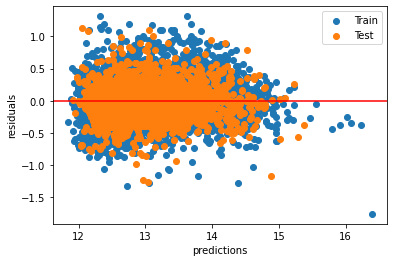



Residual qq plot


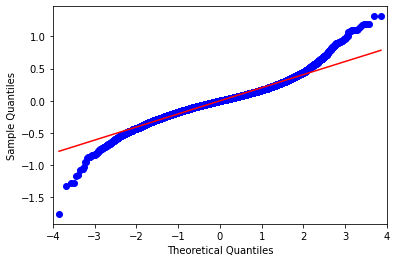

In [17]:
model_columns_1 = zipcode_column_builder(data_test, ['sqft_living', 'grade'])
model = run_model(data_train, data_test, model_columns_1, True)
model_summ = model[0].summary()

evaluate_model(data_train, data_test, model_columns_1, True)